In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.isocalendar().week
df['Date']=df['Date'].dt.day

In [7]:
print(df.shape)
print(df.columns)

(6435, 11)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')


In [8]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,15.678322,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
std,12.988182,8.755780,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,8.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,16.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,23.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,31.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   int32  
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Year          6435 non-null   int32  
 9   Month         6435 non-null   int32  
 10  Week          6435 non-null   UInt32 
dtypes: UInt32(1), float64(5), int32(3), int64(2)
memory usage: 458.9 KB


In [10]:
df.dtypes

Store             int64
Date              int32
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int32
Month             int32
Week             UInt32
dtype: object

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
numerical_columns=df.select_dtypes(include=np.number).columns
for i in numerical_columns:
  unique_values=df[i].unique()
  print(f'{i}:\n {unique_values}')

Store:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Date:
 [ 5 12 19 26  2  9 16 23 30  7 14 21 28  4 11 18 25  6 13 20 27  3 10 17
 24  1  8 15 22 29 31]
Weekly_Sales:
 [1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]
Holiday_Flag:
 [0 1]
Temperature:
 [42.31 38.51 39.93 ... 75.87 77.55 74.09]
Fuel_Price:
 [2.572 2.548 2.514 2.561 2.625 2.667 2.72  2.732 2.719 2.77  2.808 2.795
 2.78  2.835 2.854 2.826 2.759 2.705 2.668 2.637 2.653 2.669 2.642 2.623
 2.608 2.64  2.627 2.692 2.664 2.619 2.577 2.565 2.582 2.624 2.603 2.633
 2.725 2.716 2.689 2.728 2.771 2.735 2.708 2.843 2.869 2.886 2.943 2.976
 2.983 3.016 3.01  2.989 3.022 3.045 3.065 3.288 3.459 3.488 3.473 3.524
 3.622 3.743 3.807 3.81  3.906 3.899 3.907 3.786 3.699 3.648 3.637 3.594
 3.48  3.575 3.651 3.682 3.684 3.638 3.554 3.523 3.533 3.546 3.526 3.467
 3.355 3.285 3.274 3.353 3.372 3.332 3.297 3.308 3.236 3.172 3.

In [14]:
print('Outlier before clipping\n')
for i in df.drop('Date',axis=1):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

print('\nOutlier after clipping\n')
for i in ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  if (outlier):
    df[i]=df[i].clip(lower,upper)
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Outlier before clipping

Store: 0 outliers
Weekly_Sales: 34 outliers
Holiday_Flag: 450 outliers
Temperature: 3 outliers
Fuel_Price: 0 outliers
CPI: 0 outliers
Unemployment: 481 outliers
Year: 0 outliers
Month: 0 outliers
Week: 0 outliers

Outlier after clipping

Weekly_Sales: 0 outliers
Temperature: 0 outliers
Fuel_Price: 0 outliers
CPI: 0 outliers
Unemployment: 0 outliers


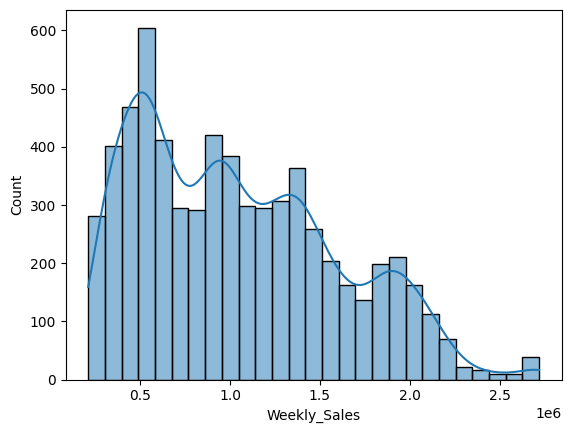

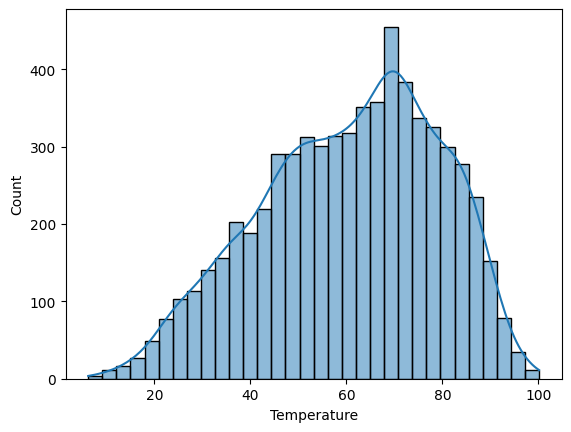

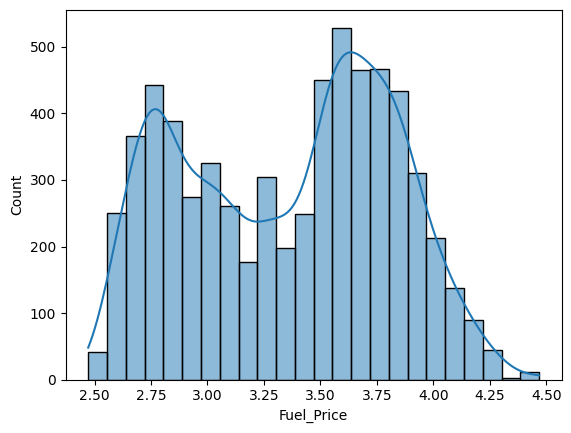

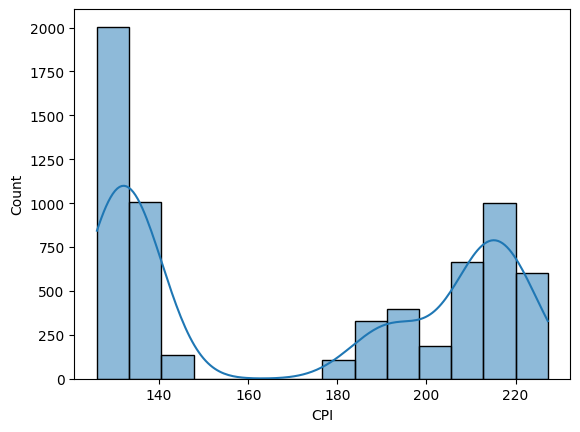

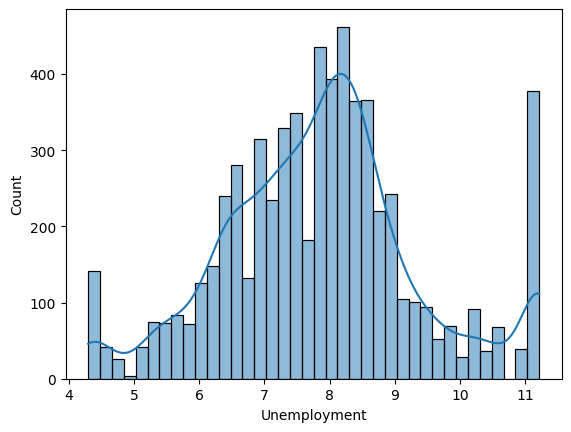

In [15]:
for i in ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']:
  sns.histplot(df[i],kde=True)
  plt.show()

In [16]:
for i in numerical_columns:
  print(f'Skewness of {i}: {df[i].skew()}')

Skewness of Store: 0.0
Skewness of Date: 0.008512293315792563
Skewness of Weekly_Sales: 0.5612516966691152
Skewness of Holiday_Flag: 3.3734986714578485
Skewness of Temperature: -0.33495790880551524
Skewness of Fuel_Price: -0.09615830011865549
Skewness of CPI: 0.06349184988549494
Skewness of Unemployment: 0.18323089884253382
Skewness of Year: 0.06264228148609109
Skewness of Month: 0.03956809400870729
Skewness of Week: 0.05151674190448141


In [17]:
df['Holiday_Flag'].value_counts(normalize=True)

Holiday_Flag
0    0.93007
1    0.06993
Name: proportion, dtype: float64

In [18]:
df['Weekly_Sales']=np.log1p(df['Weekly_Sales'])

C:\Users\subik\AppData\Local\Temp\ipykernel_8508\3965014763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month',y='Weekly_Sales',data=monthly_sales,palette='viridis')


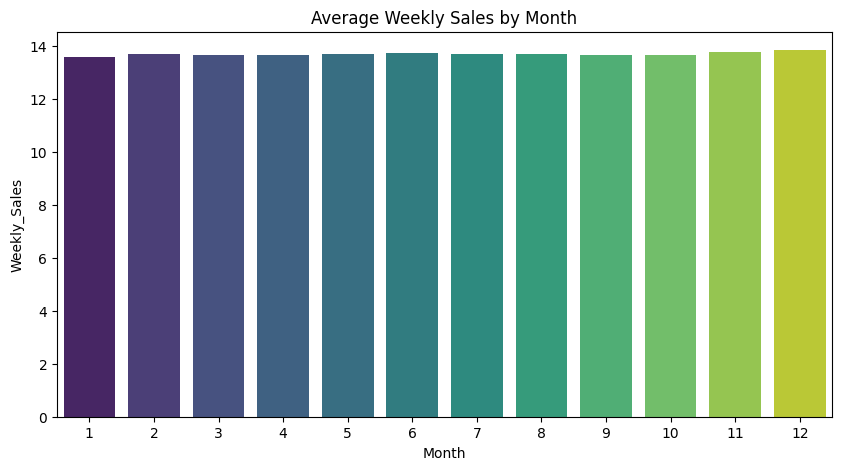

In [19]:
monthly_sales=df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Weekly_Sales',data=monthly_sales,palette='viridis')
plt.title('Average Weekly Sales by Month')
plt.show()

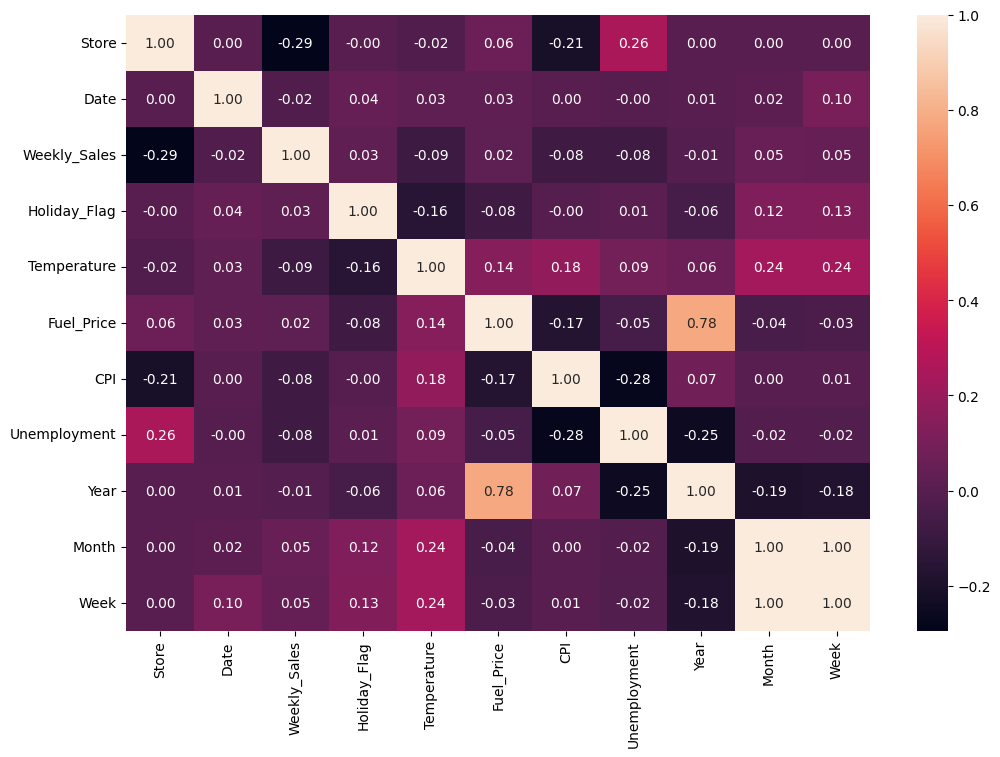

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [21]:
X=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [24]:
scale_models={
  'LinearRegression': LinearRegression(),
  'Ridge': RidgeCV(),
  'Lasso': LassoCV(),
  'SVM': SVR(),
  'KNN': KNeighborsRegressor(),
}

non_scale_models={
  'Decision Tree': DecisionTreeRegressor(),
  'Random Forest': RandomForestRegressor(),
  'Gradient Boosting': GradientBoostingRegressor(),
  'XgBoost': XGBRegressor()
}

pipelines={}
for name,model in scale_models.items():
  pipelines[name]=Pipeline([
    ('scaler',StandardScaler()),
    ('model',model)
  ])

for name,model in non_scale_models.items():
  pipelines[name]=Pipeline([
    ('model',model)
  ])

In [25]:
import mlflow
import mlflow.sklearn
from math import sqrt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
if mlflow.active_run() is not None:
    mlflow.end_run()

mlflow.set_experiment("Walmart-Sales")

results=[]

with mlflow.start_run(run_name="baseline_models"):
    best_model_name=None
    best_score=-np.inf
    best_pipe=None

    for name, pipe in pipelines.items():
        pipe.fit(X_train, y_train)
        y_pred=pipe.predict(X_test)

        r2=r2_score(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        rmse=sqrt(mean_squared_error(y_test, y_pred))

        mlflow.log_metric(f"{name}_R2", r2)
        mlflow.log_metric(f"{name}_MAE", mae)
        mlflow.log_metric(f"{name}_RMSE", rmse)

        results.append({
            "Model": name,
            "R2": r2,
            "MAE": mae,
            "RMSE": rmse
        })

        if r2>best_score:
            best_score=r2
            best_model_name=name
            best_pipe=pipe

    mlflow.log_param("best_model", best_model_name)
    mlflow.sklearn.log_model(best_pipe, name="model")

result_df=pd.DataFrame(results)
result_df=result_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
result_df

2025/09/17 20:35:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Model,R2,MAE,RMSE
0,XgBoost,0.990405,0.038959,0.058390
1,Random Forest,0.983781,0.047076,0.075916
2,Decision Tree,0.973529,0.061641,0.096985
3,Gradient Boosting,0.917978,0.133664,0.170720
4,SVM,0.363196,0.350565,0.475688
5,KNN,0.342781,0.376714,0.483252
6,LinearRegression,0.131823,0.464300,0.555422
7,Ridge,0.131098,0.464410,0.555654
8,Lasso,0.130119,0.464930,0.555967


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[50,100,200],
    "learning_rate":[0.01,0.1,1],
    "max_depth":[1,2,5]
}

tune_model=XGBRegressor()
grid=GridSearchCV(tune_model,param_grid=param_grid,cv=5,n_jobs=1)
grid.fit(X_train,y_train)

y_pred_grid=grid.predict(X_test)
r2_grid=r2_score(y_test,y_pred_grid)
mae_grid=mean_absolute_error(y_test,y_pred_grid)
rmse_grid=sqrt(mean_squared_error(y_test,y_pred_grid))

print("\nBest parameters from GridSearchCV:")
print(grid.best_params_)
print(f"R² on test set: {r2_grid:.4f}")
print(f"MAE on test set: {mae_grid:.4f}")
print(f"RMSE on test set: {rmse_grid:.4f}")

with mlflow.start_run(run_name="gridsearch_GB"):
    mlflow.log_params(grid.best_params_)
    mlflow.log_metric("R2",r2_grid)
    mlflow.log_metric("MAE",mae_grid)
    mlflow.log_metric("RMSE",rmse_grid)
    mlflow.sklearn.log_model(grid.best_estimator_,name="model",input_example=X_test.head(5))


Best parameters from GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
R² on test set: 0.9893
MAE on test set: 0.0421
RMSE on test set: 0.0615


d:\AI WORKFORCE\MLOPS PROJECT\venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [28]:
import joblib
joblib.dump(grid.best_estimator_, 'model.pkl')

['model.pkl']